In [1]:
import sys
sys.path.append(r'..//')
from ioMicro import *

### Pick a few FOVs for reference

In [ ]:
scoresRef = None

Loaded decoded: -32.126585721969604


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:34<00:00,  1.40it/s]


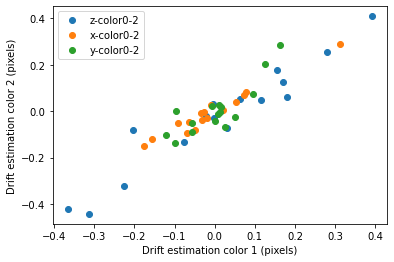

In [2]:
save_folder =r'\\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12'
fov,set_ = 'Conv_zscan__040', '_D16' ################## Change 
dec = decoder_simple(save_folder,fov,set_)
dec.ncols = 3
dec.load_decoded()
apply_fine_drift(dec,plt_val=True)
apply_flat_field(dec,tag='med_col_raw')

In [42]:
scoresRefT = get_score_per_color(dec)

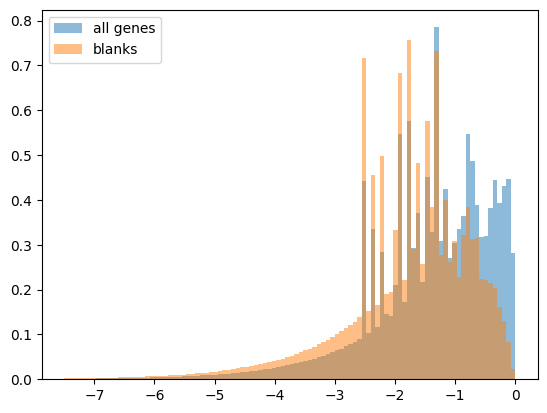

In [43]:
get_score_withRef(dec,scoresRefT,plt_val=True,gene=None,iSs = None,th_min=-7.5)

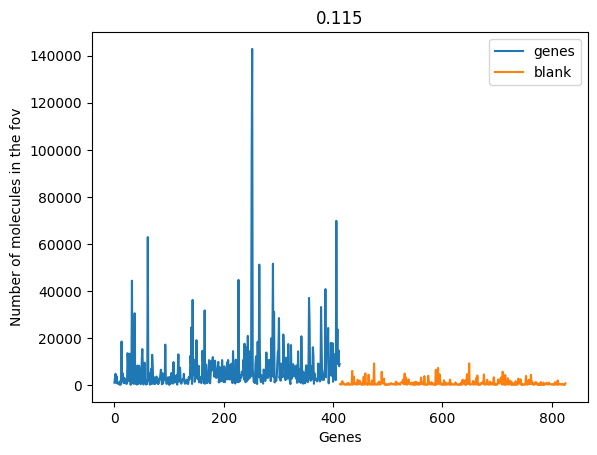

In [44]:
dec.th=-0.5
plot_statistics(dec)

In [37]:
#??plot_statistics

In [45]:
icds,ncds = np.unique(dec.icodesN[dec.scoreA>dec.th],return_counts=True)
dec.gns_names[icds[np.argsort(ncds)[::-1]]][:150]

array(['Dpysl3', 'Dpysl2', 'Elavl3', 'Cd24a', 'Agt', 'Enc1', 'Csdc2',
       'Bcl11b', 'Ddx5', 'Cnr1', 'Actg1', 'Cux2', 'Auts2', 'Ank2',
       'Bhlhe22', 'Ascl1', 'Cntf', 'Acsl3', 'Dlg4', 'Elfn1', 'Bsg', 'Dcx',
       'Cdh2', 'Adcy1', 'Aif1l', 'Cxcl10', 'Ankrd11', 'Eif4a2', 'Drd1',
       'Dsp', 'Cttnbp2', 'Camk4', 'Adgrl3', 'Cplx2', 'Casp3', 'Col19a1',
       'Dcc', 'Cck', 'Dgat2', 'Arx', 'Eno1', 'Erbb4', 'Atp2b4', 'Dgkh',
       'Chrna6', 'Dlgap5', 'Cd38', 'Elavl4', 'Aqp8', 'Fam107a', 'Bsn',
       'Arpp21', 'Baiap3', 'Egfem1', 'Dlx6os1', 'Cdk4', 'Dbpht2',
       'Col1a1', '6330403K07Rik', 'Dgkb', 'Ednrb', 'Cadps2', 'C1ql2',
       'Dlx2', 'Cbx5', 'Ckap5', 'A930003A15Rik', 'Ctsl', 'Adora2a',
       'Chek1', '1810041L15Rik', 'Cd81', 'C1qtnf4', 'Camk2a', 'Cabs1',
       'Cacnb2', 'Ccp110', 'Dact1', 'Cenpu', 'Aqp2', 'Ccnd2', 'Atxn1',
       'blank0236', 'blank0062', 'Crispld2', 'Camk2d', 'BC030343',
       'Chrdl1', 'Abi3bp', 'Ecel1', 'Dll1', 'Adcyap1', 'Fam184a',
       'Atp1b1', 'Cbl

In [47]:
viewer = plot_multigenes(dec,genes=['Cd24a','Ascl1','Arx'],colors=['r','g','b','m','c','y','w'],viewer = None,
                         smin=2,smax=20)

In [48]:
if True:
    if scoresRef is None: scoresRef=scoresRefT
    else: combine_scoresRef(scoresRef,scoresRefT)
    pickle.dump(scoresRef,open(save_folder+os.sep+'scoresRef.npy','wb'))

# START HERE: Use the reference to threshold and pull the FOVs

In [149]:
import sys
sys.path.append(r'..//')
from ioMicro import *

### Load the segmentat|ion for an entire section (i.e. _D16)

In [150]:
dic_ = np.load(r'\\192.168.0.6\bbfishjoy4extra\SegmentationCyto2\imfsegm.npz')################
imfsegm = dic_['imfsegm']
coordsf=dic_['coordsf']
resc = dic_['resc']
dic = np.load(r'\\192.168.0.6\bbfishjoy4extra\SegmentationCyto2\pos_um_fovs.npz')##################
pos=dic['pos']
fls=dic['fls']
fovs = [os.path.basename(fl).split('--')[0]for fl in fls]
set_ = '_'+os.path.basename(fls[0]).split('--')[1].split('_')[-1]

In [3]:

#set_

In [673]:
save_folders = [r'\\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12',
                r'\\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP34',
                r'\\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1',
                r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\MERFISH_AnalysisP56',
                r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\MERFISH_AnalysisP711',
                r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\MERFISH_AnalysisE2']
for fld in save_folders:
    print(os.path.exists(fld))

True
True
True
True
True
True


In [704]:
fls_dec = []
for fld in save_folders:
    fls_dec+=[glob.glob(fld+os.sep+'decodedNew*')]
for fls in fls_dec:
    fls_ = [fl for fl in fls if 'decodedNew' in fl]
    print(os.path.basename(os.path.dirname(fls_[0])),len(fls_))

MERFISH_AnalysisP12 797
MERFISH_AnalysisP34 797
MERFISH_AnalysisE1 797
MERFISH_AnalysisP56 797
MERFISH_AnalysisP711 797
MERFISH_AnalysisE2 797


In [706]:
def get_fov_set(fl):
    base = os.path.basename(fl)
    ifov = int(base.split('--')[0].split('_')[-1])
    set_ = base.split('--')[-1].split('.')[0]
    return (set_,ifov)
#for fl in fls_
full_set = [get_fov_set(fl) for fl in np.sort(fls_dec[-1])]
print(len(full_set))
for fls_ in fls_dec:
    print(os.path.basename(os.path.dirname(fls_[0])))
    full_set_ = [get_fov_set(fl) for fl in np.sort(fls_)]
    print([e for e in full_set if e not in full_set_])
    print()

797
MERFISH_AnalysisP12
[]

MERFISH_AnalysisP34
[]

MERFISH_AnalysisE1
[]

MERFISH_AnalysisP56
[]

MERFISH_AnalysisP711
[]

MERFISH_AnalysisE2
[]



In [666]:
for fls in fls_dec:
    fls_ = [fl for fl in fls if 'decodedNew' in fl]
    print(os.path.basename(os.path.dirname(fls_[0])),len(fls_))

MERFISH_AnalysisP12 784
MERFISH_AnalysisP34 794
MERFISH_AnalysisE1 775
MERFISH_AnalysisP56 795
MERFISH_AnalysisP711 797
MERFISH_AnalysisE2 787


In [ ]:
Scope1Ana1 -engeded in E1
#P34; E1
Scope2Ana2-engaged in E2
#p56; E2
Scope1Ana2 - engaged in P12
#P12
Scope1
#P711


In [671]:
dic_libs['Ptbp1']

['p711']

In [665]:
#fls_dec

### Itterate through each fov in section (set i.e. _D16)

In [4]:
paramaters = [(fov,set_,save_folder)for fov in fovs for save_folder in save_folders]
len(paramaters)

1554

In [5]:
fov,set_,save_folder = paramaters[700]

#fov = 'Conv_zscan__010'
print(fov,set_,save_folder)

Conv_zscan__116 _D16 \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\MERFISH_AnalysisP711


In [9]:
main_analysisV1(fov,set_,
                   save_folder = save_folder,
                   save_fl_ref = r'\\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12\scoresRef.npy',
                   save_folder_all = r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots',
                   drift_folder = r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\DriftAcrossDatasets',
                   segm_tag = 'A1_LamA_Nup98_D16')

In [44]:
im = read_im(r'\\192.168.0.7\bbfishmahsa\CGBB_embryo_4_28_2023\H17_MER_D16\Conv_zscan__033.zarr')
import napari
napari.view_image(im)

Viewer(axes=Axes(visible=False, labels=True, colored=True, dashed=False, arrows=True), camera=Camera(center=(0.0, 1449.5, 1449.5), zoom=0.16772413793103447, angles=(0.0, 0.0, 90.0), perspective=0.0, interactive=True), cursor=Cursor(position=(1.0, 1.0, 0.0, 0.0), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=4, ndisplay=2, last_used=0, range=((0.0, 4.0, 1.0), (0.0, 30.0, 1.0), (0.0, 2900.0, 1.0), (0.0, 2900.0, 1.0)), current_step=(2, 15, 1450, 1450), order=(0, 1, 2, 3), axis_labels=('0', '1', '2', '3')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Image layer 'im' at 0x251954c9b80>], scale_bar=ScaleBar(visible=False, colored=False, ticks=True, position=<Position.BOTTOM_RIGHT: 'bottom_right'>, font_size=10, unit=None), text_overlay=TextOverlay(visible=False, color=(0.5, 0.5, 0.5, 1.0), font_size=10, position=<TextOverlayPosition.TOP_LEFT: 'top_left'>, text=''), overlays=Overlays(interaction_box=InteractionBox(points=None, show=False

In [147]:
save_folders

NameError: name 'save_folders' is not defined

In [279]:
fov,set_,save_folder='Conv_zscan__072', '_D16',r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\MERFISH_AnalysisP56'
#72,46,59
dec = main_analysisV1(fov,set_,
                       save_folder = save_folder,
                       save_fl_ref = r'\\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12\scoresRef.npy',
                       save_folder_all = r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots',
                       drift_folder = r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\DriftAcrossDatasets',
                       segm_tag = 'A1_LamA_Nup98_D16',redo=True)

Loaded decoded: -33.643991470336914
Molecules size: (15220876, 4, 10)
Covering reaoduts: [ 0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  12.5
 13.  13.5 14.  14.5 15.  16.  17.  18.  19.  20.  21.  22.  23.  24.
 25.  26.  27.  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.
 39.  40.  41.  42.  43.  44.  45.  46.  47. ]


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:22<00:00,  2.10it/s]


Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__072--_D16.npz


In [ ]:
dec.

In [273]:
save_folder_all = r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots'
drift_folder = r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\DriftAcrossDatasets'
segm_tag = 'A1_LamA_Nup98_D16'
drift_semgentation = np.array([  -2.5602207, -486.3025   ,   -5.648471 ])

####### Threhold the decoded spot data #############################
keepf =  dec.scoreA>dec.th ### keep good score
icodesf = dec.icodesN[keepf]
XHfpr = dec.XH_pruned[keepf]

### Reorganize data  ###############################
XHf = np.mean(XHfpr,axis=1)
XF = XHf[:,[0,1,2,-5,-4,-3,-2,-1,-1,-1,-1]]
#zc,xc,yc,bk-7,a-6,habs-5,hn-4,h-3
XF[:,-1] = dec.scoreA[keepf]
XF[:,-2] = np.where(keepf)[0]
mnD = np.mean(np.linalg.norm((XHf[:,np.newaxis]-XHfpr)[:,:,:3],axis=-1),axis=-1)
XF[:,-3]=mnD
mnH = np.mean(np.abs((XHf[:,np.newaxis]-XHfpr)[:,:,-3]),axis=-1)
XF[:,-4]=mnH
genesf = dec.gns_names[icodesf]

### Apply drift to match the segmentation reference ########################
def get_drft_dic(fl_all_drift):
    drft,flds,fov_,fl_ref= np.load(fl_all_drift,allow_pickle=True)
    return {('--'.join(fld.split(os.sep)[-2:]) if '--' in os.path.basename(fld) else os.path.basename(fld)):drft_[0] 
            for fld,drft_ in zip(flds,drft)}

fl_all_drift = drift_folder+os.sep+'driftNew_'+dec.fov+'--'+dec.set_+'.pkl'
drft_dic_all = get_drft_dic(fl_all_drift)
fl_all_drift = save_folder+os.sep+'driftNew_'+dec.fov+'--'+dec.set_+'.pkl'
drft_dic_group = get_drft_dic(fl_all_drift)
key_segm = [key for key in drft_dic_all if segm_tag in key][0]
key_align = np.intersect1d(list(drft_dic_all.keys()),list(drft_dic_group.keys()))[0]
if drift_semgentation is None:
    drift_semgentation = drft_dic_all[key_segm]
th1_to_h0 = drift_semgentation-drft_dic_all[key_align]
th1_gr = drft_dic_group[key_align]
tzxyf = th1_gr+th1_to_h0

XF[:,:3]=XF[:,:3]-tzxyf #### do not add here

        
        
### Load in the current fov segmentation ######################################
ifov = fovs.index(dec.fov)
coords= coordsf[ifov]
xIm,xIM,yIm,yIM = coords[0],coords[1],coords[2],coords[3]
min_ = np.min(XF[:,:3],axis=0)
max_ = np.max(XF[:,:3],axis=0)

xIm,yIm = np.round([xIm,yIm]+(min_/resc)[1:]).astype(int)
### deal with the case of outside image
Im = np.array([xIm,yIm])
min_[1:]=min_[1:]-Im*(Im<0)*resc[1:]
### recenter
xIm,xIM,yIm,yIM = coords[0],coords[1],coords[2],coords[3]
xIm,yIm = np.round([xIm,yIm]+(min_/resc)[1:]).astype(int)
XF__=XF[:,:3]-min_
xIM,yIM = np.round([xIm,yIm]+(max_/resc)[1:]).astype(int)
dec.im_segm_ = imfsegm[:,xIm:xIM,yIm:yIM]
dec.XF__ = XF__
dec.XF = XF
dec.resc = resc

#### get cell ids #######################
def get_cell_id(dec,Xh,resc=[2,2,2],plot_val = False):
    if not hasattr(dec,'im_segm_'): 
        good = np.ones(len(Xh),dtype=bool)
        cells_ = np.zeros(len(Xh),dtype=int)
        return cells_,good
    im_segm = dec.im_segm_
    dec.shapesm = dec.im_segm_.shape
    Xcms = Xh[:,:3]
    Xred = np.round(Xcms/resc).astype(int)
    good = ~np.any((Xred>=dec.shapesm)|(Xred<0),axis=-1)
    Xred = Xred[good]
    if plot_val:
        v = napari.view_points(Xred,size=1.5)
        v.add_labels(im_segm)
    return im_segm[tuple(Xred.T)],good


cell_id,good =get_cell_id(dec,XF__,resc=resc,plot_val = False)
#XF_ = np.concatenate([XF[good],cell_id[:,np.newaxis]],axis=-1)
genesf_ = genesf[good]
iset = int(dec.set_.split('_D')[-1])
ifov = int(dec.fov.split('_')[-1].split('.')[0])
isets = np.array([iset]*len(cell_id))[:,np.newaxis]
ifovs = np.array([ifov]*len(cell_id))[:,np.newaxis]
cell_id = cell_id[:,np.newaxis]
XF_ = np.concatenate([XF[good],cell_id,ifovs,isets],axis=-1)

In [271]:
xIm-coords[0],yIm-coords[2]

(486, 2)

In [272]:
Im*(Im<0)*resc[1:]

array([0, 0])

In [274]:
import napari
get_cell_id(dec,XF__,resc=resc,plot_val = True)

(array([      0, 5900428, 5900428, ...,       0, 7407581,       0]),
 array([ True,  True,  True, ...,  True,  True,  True]))

In [ ]:
        #### get cell ids #######################
        def get_cell_id(dec,Xh,resc=[2,2,2],plot_val = False):
            if not hasattr(dec,'im_segm_'): 
                good = np.ones(len(Xh),dtype=bool)
                cells_ = np.zeros(len(Xh),dtype=int)
                return cells_,good
            im_segm = dec.im_segm_
            dec.shapesm = dec.im_segm_.shape
            Xcms = Xh[:,:3]
            Xred = np.round(Xcms/resc).astype(int)
            good = ~np.any((Xred>=dec.shapesm)|(Xred<0),axis=-1)
            Xred = Xred[good]
            if plot_val:
                v = napari.view_points(Xred,size=1.5)
                v.add_labels(im_segm)
            return im_segm[tuple(Xred.T)],good

In [247]:
im_segm = dec.im_segm_
dec.shapesm = dec.im_segm_.shape
Xcms = XF[:,:3]-tzxyf
Xred = np.round(Xcms/resc).astype(int)
#good = ~np.any((Xred>=dec.shapesm)|(Xred<0),axis=-1)
#Xred = Xred[good]
X2d,Y2d = Xred[genesf=='Psap'][:,1:].T


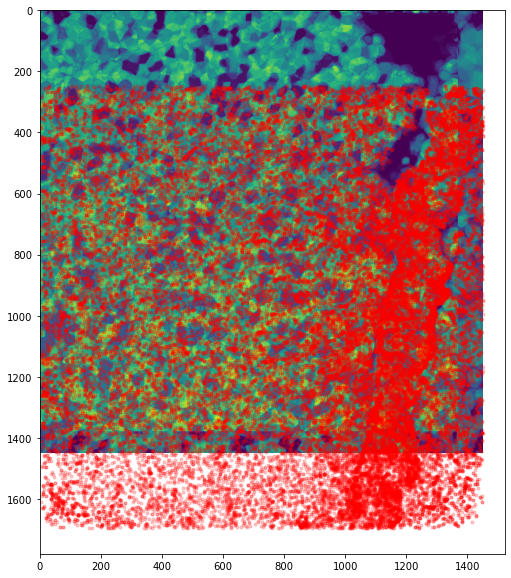

In [251]:
plt.figure(figsize=(10,10))
plt.imshow(np.mean(dec.im_segm_%(10**5),axis=0))
plt.plot(Y2d,X2d,'r.',alpha=0.2)

In [16]:
os.path.exists(r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\MERFISH_AnalysisP56\decodedNew_Conv_zscan__009--_D16.npz')

True

In [17]:
fls = glob.glob(r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--*')

In [22]:
dic_plate = {}
for fl in fls:
    base = os.path.basename(fl)
    _,plate,fov,set_=base.split('--')
    if plate not in dic_plate: dic_plate[plate]=[]
    dic_plate[plate].append(fov)    

In [24]:
{plate:len(dic_plate[plate])for plate in dic_plate}

{'MERFISH_AnalysisP12': 241,
 'MERFISH_AnalysisP711': 259,
 'MERFISH_AnalysisP56': 257,
 'MERFISH_AnalysisP34': 258,
 'MERFISH_AnalysisE2': 258,
 'MERFISH_AnalysisE1': 131}

In [43]:
np.setdiff1d(np.arange(259),[int(fl.split('_')[-1])for fl in np.sort(dic_plate['MERFISH_AnalysisE2'])])

array([61])

  4%|███▎                                                                           | 64/1554 [00:00<00:03, 399.96it/s]

Failed at: Conv_zscan__010 _D16 \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\MERFISH_AnalysisP56
Loaded decoded: -1.2632801532745361



  7%|█████▎                                                                         | 104/1554 [00:03<01:03, 22.96it/s]

Failed at: Conv_zscan__013 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP34
Loaded decoded: -0.12252449989318848



 12%|█████████▎                                                                     | 183/1554 [00:04<00:24, 55.14it/s]

Failed at: Conv_zscan__019 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12
Failed at: Conv_zscan__030 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1


 17%|█████████████▎                                                                | 264/1554 [00:04<00:12, 106.26it/s]

Failed at: Conv_zscan__033 _D16 \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\MERFISH_AnalysisP56
Failed at: Conv_zscan__043 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1


 24%|██████████████████▋                                                           | 372/1554 [00:04<00:06, 196.43it/s]

Failed at: Conv_zscan__053 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__061 _D16 \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\MERFISH_AnalysisE2


 28%|██████████████████████▏                                                       | 441/1554 [00:04<00:04, 271.02it/s]

Loaded decoded: -3.3245885372161865



 33%|█████████████████████████▊                                                     | 507/1554 [00:29<02:18,  7.53it/s]

Failed at: Conv_zscan__084 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -4.378531217575073



 34%|██████████████████████████▋                                                    | 526/1554 [01:03<05:36,  3.05it/s]

Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisE1--Conv_zscan__085--_D16.npz
Failed at: Conv_zscan__086 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__087 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__088 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1


 36%|████████████████████████████▋                                                  | 565/1554 [01:03<03:37,  4.55it/s]

Failed at: Conv_zscan__089 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__090 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__091 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__092 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__093 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__094 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1


 38%|██████████████████████████████▎                                                | 597/1554 [01:03<02:32,  6.26it/s]

Failed at: Conv_zscan__095 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__096 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__097 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__098 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__099 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1


 40%|███████████████████████████████▋                                               | 623/1554 [01:03<01:52,  8.24it/s]

Failed at: Conv_zscan__100 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__101 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__102 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__103 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__104 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__105 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__106 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__107 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1


 43%|██████████████████████████████████                                             | 671/1554 [01:04<01:02, 14.20it/s]

Failed at: Conv_zscan__108 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__109 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__110 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__111 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__112 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__113 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__114 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1


 46%|████████████████████████████████████▎                                          | 715/1554 [01:04<00:34, 24.48it/s]

Failed at: Conv_zscan__115 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__116 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__117 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__118 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__119 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: 

 49%|██████████████████████████████████████▉                                        | 765/1554 [01:04<00:17, 44.92it/s]

Conv_zscan__120 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__121 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__122 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__123 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__124 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__125 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__126 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__127 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__128

 51%|████████████████████████████████████████                                       | 787/1554 [01:04<00:13, 57.04it/s]

 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__129 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__130 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__131 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1


 52%|█████████████████████████████████████████                                      | 808/1554 [01:04<00:11, 66.06it/s]

Failed at: Conv_zscan__132 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__133 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__134 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -0.30605173110961914



 55%|███████████████████████████████████████████▏                                   | 849/1554 [01:06<00:14, 49.55it/s]

Failed at: Conv_zscan__135 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12
Failed at: Conv_zscan__135 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__136 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__137 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__138 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__139 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__140 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__141 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1


 56%|████████████████████████████████████████████▍                                  | 875/1554 [01:06<00:09, 67.96it/s]

Failed at: Conv_zscan__142 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__143 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__144 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__145 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__146 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__147 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__148 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1


 60%|██████████████████████████████████████████████▊                               | 933/1554 [01:06<00:05, 118.31it/s]

Failed at: Conv_zscan__149 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__150 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__151 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__152 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__153 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__154 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__155 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__156 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1


 63%|█████████████████████████████████████████████████                             | 978/1554 [01:06<00:04, 142.17it/s]

Failed at: Conv_zscan__157 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__158 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__159 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__160 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__161 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__162 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__163 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1


 67%|███████████████████████████████████████████████████▎                         | 1035/1554 [01:06<00:02, 185.14it/s]

Failed at: Conv_zscan__164 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__165 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__166 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__167 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__168 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__169 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__170 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__171 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__172 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1


 68%|████████████████████████████████████████████████████▍                        | 1059/1554 [01:06<00:02, 192.32it/s]

Failed at: Conv_zscan__173 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__174 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__175 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__176 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__177 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__178 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__179 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__180 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12


 71%|██████████████████████████████████████████████████████▋                      | 1103/1554 [01:07<00:02, 173.03it/s]

Failed at: Conv_zscan__180 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__181 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12
Failed at: Conv_zscan__181 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__182 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12
Failed at: Conv_zscan__182 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__183 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12
Failed at: Conv_zscan__183 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__184 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12
Failed at: Conv_zscan__184 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1


 72%|███████████████████████████████████████████████████████▌                     | 1122/1554 [01:07<00:02, 152.53it/s]

Failed at: Conv_zscan__185 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12
Failed at: Conv_zscan__185 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__186 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12
Failed at: Conv_zscan__186 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__187 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12
Failed at: Conv_zscan__187 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__188 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12
Failed at: Conv_zscan__188 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1


 73%|████████████████████████████████████████████████████████▍                    | 1139/1554 [01:07<00:03, 134.23it/s]

Failed at: Conv_zscan__189 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12
Failed at: Conv_zscan__189 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__190 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12
Failed at: Conv_zscan__190 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__191 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12
Failed at: Conv_zscan__191 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1


 75%|█████████████████████████████████████████████████████████▊                   | 1167/1554 [01:07<00:03, 111.46it/s]

Failed at: Conv_zscan__192 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12
Failed at: Conv_zscan__192 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__193 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12
Failed at: Conv_zscan__193 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__194 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12
Failed at: Conv_zscan__194 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1


 77%|████████████████████████████████████████████████████████████                  | 1197/1554 [01:08<00:03, 99.30it/s]

Failed at: Conv_zscan__195 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12
Failed at: Conv_zscan__195 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__196 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__197 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__198 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__199 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__200 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1


 80%|█████████████████████████████████████████████████████████████▋               | 1246/1554 [01:08<00:02, 149.43it/s]

Failed at: Conv_zscan__201 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__202 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__203 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__204 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__205 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__206 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__207 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__208 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1


 88%|███████████████████████████████████████████████████████████████████▉         | 1372/1554 [01:08<00:00, 360.72it/s]

Failed at: Conv_zscan__215 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1


100%|██████████████████████████████████████████████████████████████████████████████| 1554/1554 [01:08<00:00, 22.54it/s]


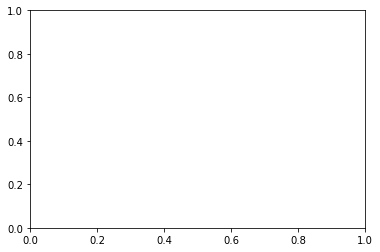

In [13]:
for fov,set_,save_folder in tqdm(paramaters):
    try:
        main_analysisV1(fov,set_,
                       save_folder = save_folder,
                       save_fl_ref = r'\\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12\scoresRef.npy',
                       save_folder_all = r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots',
                       drift_folder = r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\DriftAcrossDatasets',
                       segm_tag = 'A1_LamA_Nup98_D16')
    except:
        print("Failed at:",fov,set_,save_folder)

In [276]:
def apply_flat_field(dec,tag=r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\DriftAcrossDatasets\med_col_raw'):
    ### load the immeds
    Icol = dec.XH_pruned[:,:,-2].astype(int)
    uIcols = np.unique(Icol)
    dec.ncols = len(uIcols)
    #save_folder=dec.save_folder#r'\\192.168.0.10\bbfishdc13\DCBBL1_3_2_2023\MERFISH_Analysis'
    immeds = []
    for icol in range(dec.ncols):
        fl_med = tag+str(icol)+'.npz'
        if not os.path.exists(fl_med):
            fl_med = fl_med.replace('_raw','')
        dic = np.load(fl_med)
        immed,resc=dic['im'],dic['resc']
        immeds.append(immed)
    dec.immeds = np.array(immeds)
    dec.resc = resc
    
    ### renormalize the brightness according to flatfield
    XH = dec.XH_pruned
    Icol = XH[:,:,-2].astype(int)
    H = dec.XH_pruned[:,:,-3].copy()
    for icol in range(dec.ncols):
        keep = Icol==icol
        immed = dec.immeds[icol].copy()
        immed = immed/np.median(immed)
        x_,y_ = ((XH[keep][:,1:3]/dec.resc).astype(int)%immed.shape).T
        norm_ = immed[x_,y_] 
        H[keep]=H[keep]/norm_
    dec.XH_pruned[:,:,-3] = H


def main_analysisV1(fov,set_,
                   save_folder = r'\\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12',
                   save_fl_ref = r'\\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12\scoresRef.npy',
                   save_folder_all = r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots',
                   drift_folder = r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\DriftAcrossDatasets',
                   segm_tag = 'A1_LamA_Nup98_D16',redo=False,resc=[2,2,2],
                   drift_semgentation = np.array([  -2.5602207, -486.3025   ,   -5.648471 ])):


    if not os.path.exists(save_folder_all): os.makedirs(save_folder_all)
    save_fl = save_folder_all+os.sep+'saveDecodedFinalV1--'+os.path.basename(save_folder)+'--'+fov.split('.')[0]+'--'+set_+'.npz'
    dec = None
    if not os.path.exists(save_fl) or redo:
        ####### Load in the decoded spot data #############################
        #fov,set_ = 'Conv_zscan__040', '_D16' ################## Change 
        dec = decoder_simple(save_folder,fov,set_)
        dec.ncols = 3
        dec.load_decoded()
        print("Molecules size:",dec.XH_pruned.shape)
        print("Covering reaoduts:",np.unique(dec.XH_pruned[:,:,-1]))
        apply_fine_drift(dec,plt_val=True)
        apply_flat_field(dec)
        #scoresRefT = get_score_per_color(dec)
        scoresRef = np.load(save_fl_ref,allow_pickle=True)
        get_score_withRef(dec,scoresRef,plt_val=True,gene=None,iSs = None,th_min=-10)
        dec.th=-0.5
        plot_statistics(dec)

        ####### Threhold the decoded spot data #############################
        keepf =  dec.scoreA>dec.th ### keep good score
        icodesf = dec.icodesN[keepf]
        XHfpr = dec.XH_pruned[keepf]

        ### Reorganize data  ###############################
        XHf = np.mean(XHfpr,axis=1)
        XF = XHf[:,[0,1,2,-5,-4,-3,-2,-1,-1,-1,-1]]
        #zc,xc,yc,bk-7,a-6,habs-5,hn-4,h-3
        XF[:,-1] = dec.scoreA[keepf]
        XF[:,-2] = np.where(keepf)[0]
        mnD = np.mean(np.linalg.norm((XHf[:,np.newaxis]-XHfpr)[:,:,:3],axis=-1),axis=-1)
        XF[:,-3]=mnD
        mnH = np.mean(np.abs((XHf[:,np.newaxis]-XHfpr)[:,:,-3]),axis=-1)
        XF[:,-4]=mnH
        genesf = dec.gns_names[icodesf]

        ### Apply drift to match the segmentation reference ########################
        def get_drft_dic(fl_all_drift):
            drft,flds,fov_,fl_ref= np.load(fl_all_drift,allow_pickle=True)
            return {('--'.join(fld.split(os.sep)[-2:]) if '--' in os.path.basename(fld) else os.path.basename(fld)):drft_[0] 
                    for fld,drft_ in zip(flds,drft)}

        fl_all_drift = drift_folder+os.sep+'driftNew_'+dec.fov+'--'+dec.set_+'.pkl'
        drft_dic_all = get_drft_dic(fl_all_drift)
        fl_all_drift = save_folder+os.sep+'driftNew_'+dec.fov+'--'+dec.set_+'.pkl'
        drft_dic_group = get_drft_dic(fl_all_drift)
        key_segm = [key for key in drft_dic_all if segm_tag in key][0]
        key_align = np.intersect1d(list(drft_dic_all.keys()),list(drft_dic_group.keys()))[0]
        if drift_semgentation is None:
            drift_semgentation = drft_dic_all[key_segm]
        th1_to_h0 = drift_semgentation-drft_dic_all[key_align]
        th1_gr = drft_dic_group[key_align]
        tzxyf = th1_gr+th1_to_h0

        XF[:,:3]=XF[:,:3]-tzxyf #### do not add here

        
                
        ### Load in the current fov segmentation ######################################
        ifov = fovs.index(dec.fov)
        coords= coordsf[ifov]
        xIm,xIM,yIm,yIM = coords[0],coords[1],coords[2],coords[3]
        min_ = np.min(XF[:,:3],axis=0)
        max_ = np.max(XF[:,:3],axis=0)

        xIm,yIm = np.round([xIm,yIm]+(min_/resc)[1:]).astype(int)
        ### deal with the case of outside image
        Im = np.array([xIm,yIm])
        min_[1:]=min_[1:]-Im*(Im<0)*resc[1:]
        ### recenter
        xIm,xIM,yIm,yIM = coords[0],coords[1],coords[2],coords[3]
        xIm,yIm = np.round([xIm,yIm]+(min_/resc)[1:]).astype(int)
        XF__=XF[:,:3]-min_
        xIM,yIM = np.round([xIm,yIm]+(max_/resc)[1:]).astype(int)
        dec.im_segm_ = imfsegm[:,xIm:xIM,yIm:yIM]
        dec.XF__ = XF__
        dec.XF = XF
        dec.resc = resc

        #### get cell ids #######################
        def get_cell_id(dec,Xh,resc=[2,2,2],plot_val = False):
            if not hasattr(dec,'im_segm_'): 
                good = np.ones(len(Xh),dtype=bool)
                cells_ = np.zeros(len(Xh),dtype=int)
                return cells_,good
            im_segm = dec.im_segm_
            dec.shapesm = dec.im_segm_.shape
            Xcms = Xh[:,:3]
            Xred = np.round(Xcms/resc).astype(int)
            good = ~np.any((Xred>=dec.shapesm)|(Xred<0),axis=-1)
            Xred = Xred[good]
            if plot_val:
                v = napari.view_points(Xred,size=1.5)
                v.add_labels(im_segm)
            return im_segm[tuple(Xred.T)],good


        cell_id,good =get_cell_id(dec,XF__,resc=resc,plot_val = False)
        #XF_ = np.concatenate([XF[good],cell_id[:,np.newaxis]],axis=-1)
        genesf_ = genesf[good]
        iset = int(dec.set_.split('_D')[-1])
        ifov = int(dec.fov.split('_')[-1].split('.')[0])
        isets = np.array([iset]*len(cell_id))[:,np.newaxis]
        ifovs = np.array([ifov]*len(cell_id))[:,np.newaxis]
        cell_id = cell_id[:,np.newaxis]
        XF_ = np.concatenate([XF[good],cell_id,ifovs,isets],axis=-1)

        #get_xyfov(dec)
        ### add absolute positiuons of molecules in um
        pixel_size = np.array([0.4,0.10833,0.10833])*resc
        XF_ = XF_[:,list(np.arange(XF_.shape[-1]))+[-1,-1,-1]]
        XF_[:,-3:]=((XF_[:,:3]/resc)+[0,coords[0],coords[2]])*pixel_size
        header = ['z','x','y','abs_brightness','cor','brightness','color','mean_bightness_variation','mean_distance_variation',
                  'index_from_XH_pruned','score','cell_id','ifov','iset','z_um_abs','x_um_abs','y_um_abs']


        ##### get info for cells #########################
        if not hasattr(dec,'im_segm_'): dec.im_segm_=np.zeros(np.array([30,3000,3000])//2)
        icells,vols = np.unique(dec.im_segm_,return_counts=True)
        cms = np.array(ndimage.center_of_mass(np.ones_like(dec.im_segm_),dec.im_segm_,icells))
        #icells,vols = np.unique(dec.im_segm_,return_counts=True)
        cms = np.array(ndimage.center_of_mass(np.ones_like(dec.im_segm_),dec.im_segm_,icells))

        cells_abs_pos = (cms+[0,coords[0],coords[2]])*pixel_size

        cellinfo = cms[:,[0,0,0,1,2,0,0,0]]
        cellinfo[:,0]=icells
        cellinfo[:,1]=vols
        cellinfo[:,-3:]=cells_abs_pos

        header_cells = ['cell_id','volm','zc','xc','yc','z_um_abs','x_um_abs','y_um_abs']
        plt.close('all')

        if True:
            np.savez_compressed(save_fl,XF=XF_.astype(np.float32),
                                genes = genesf_,cellinfo=cellinfo.astype(np.float32),header_cells=header_cells,header=header)
        print("Finished",save_fl)
    return dec

In [228]:
tzxyf

array([  -0.49323884, -490.68161153,  -11.47193898])

In [230]:
XF

array([[ 2.99705710e+00, -2.01064180e+00,  3.19483165e+02, ...,
         7.66837352e-01,  7.00000000e+00, -3.54171301e-01],
       [ 2.54684227e+00, -9.37960142e-01,  4.44141545e+02, ...,
         6.42068950e-01,  1.20000000e+01, -3.54513511e-01],
       [ 2.56763349e+00, -8.84913250e-01,  4.43884871e+02, ...,
         8.00639568e-01,  1.30000000e+01, -4.71825731e-01],
       ...,
       [ 2.50613826e+01,  2.57889248e+03,  2.63255174e+03, ...,
         3.86236631e-01,  1.61000540e+07, -3.44378731e-01],
       [ 2.57563837e+01,  2.70320620e+03,  2.78721543e+03, ...,
         6.37035498e-01,  1.61000550e+07, -2.07321572e-01],
       [ 2.49907764e+01,  2.86270974e+03,  2.55976066e+03, ...,
         3.24008782e-01,  1.61000570e+07, -2.25844841e-01]])

In [13]:
plt.close('all')

In [2]:
import sys
sys.path.append(r'..//')
from ioMicro import *

In [4]:
save_fls_

['\\\\192.168.0.7\\bbfishmahsa3\\CGBB_embryo_4_28_2023\\FinalDecodedSpots\\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__040--_D16.npz',
 '\\\\192.168.0.7\\bbfishmahsa3\\CGBB_embryo_4_28_2023\\FinalDecodedSpots\\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__016--_D16.npz',
 '\\\\192.168.0.7\\bbfishmahsa3\\CGBB_embryo_4_28_2023\\FinalDecodedSpots\\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__059--_D16.npz',
 '\\\\192.168.0.7\\bbfishmahsa3\\CGBB_embryo_4_28_2023\\FinalDecodedSpots\\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__000--_D16.npz',
 '\\\\192.168.0.7\\bbfishmahsa3\\CGBB_embryo_4_28_2023\\FinalDecodedSpots\\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__000--_D16.npz',
 '\\\\192.168.0.7\\bbfishmahsa3\\CGBB_embryo_4_28_2023\\FinalDecodedSpots\\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__000--_D16.npz',
 '\\\\192.168.0.7\\bbfishmahsa3\\CGBB_embryo_4_28_2023\\FinalDecodedSpots\\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__000--

In [280]:
#save_fls_[:5]

save_fls_ = glob.glob(r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--*AnalysisP56*Conv_zscan__059*')
save_fls_ += glob.glob(r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--*AnalysisP56*Conv_zscan__072*')
save_fls_ += glob.glob(r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--*AnalysisP56*Conv_zscan__046*')
if False:
    save_fls_ += glob.glob(r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--*Conv_zscan__060*')
    save_fls_ += glob.glob(r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--*Conv_zscan__058*')
    save_fls_ += glob.glob(r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--*Conv_zscan__073*')
    save_fls_ += glob.glob(r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--*Conv_zscan__061*')
    save_fls_ += glob.glob(r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--*Conv_zscan__060*')
    save_fls_ += glob.glob(r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--*Conv_zscan__056*')
    save_fls_ += glob.glob(r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--*Conv_zscan__062*')
save_fls_

['\\\\192.168.0.7\\bbfishmahsa3\\CGBB_embryo_4_28_2023\\FinalDecodedSpots\\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__059--_D16.npz',
 '\\\\192.168.0.7\\bbfishmahsa3\\CGBB_embryo_4_28_2023\\FinalDecodedSpots\\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__072--_D16.npz',
 '\\\\192.168.0.7\\bbfishmahsa3\\CGBB_embryo_4_28_2023\\FinalDecodedSpots\\saveDecodedFinalV1--MERFISH_AnalysisP56--Conv_zscan__046--_D16.npz']

In [218]:
save_fls_ = glob.glob(r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpotsV2\saveDecodedFinalV1--*an__059*')

In [219]:
len(save_fls_)

1472

In [53]:
glob.glob(r'C:\Scripts\NMERFISH\codebooks\blank_codebook_Mahsa_*')

['C:\\Scripts\\NMERFISH\\codebooks\\blank_codebook_Mahsa_DevEP1-code_color2__comb16-4-4.csv',
 'C:\\Scripts\\NMERFISH\\codebooks\\blank_codebook_Mahsa_DevEP2-code_color2__comb16-4-4.csv',
 'C:\\Scripts\\NMERFISH\\codebooks\\blank_codebook_Mahsa_DevP1P2-code_color2__comb16-4-4.csv',
 'C:\\Scripts\\NMERFISH\\codebooks\\blank_codebook_Mahsa_DevP3P4-code_color2__comb16-4-4.csv',
 'C:\\Scripts\\NMERFISH\\codebooks\\blank_codebook_Mahsa_DevP5P6-code_color2__comb16-4-4.csv',
 'C:\\Scripts\\NMERFISH\\codebooks\\blank_codebook_Mahsa_DevP7P11-code_color2__comb16-4-4.csv']

In [619]:
tags_lib = ['-e1','-e2','-p12','-p34','-p56','-p711']
fls_lib = ['C:\\Scripts\\NMERFISH\\codebooks\\blank_codebook_Mahsa_DevEP1-code_color2__comb16-4-4.csv',
 'C:\\Scripts\\NMERFISH\\codebooks\\blank_codebook_Mahsa_DevEP2-code_color2__comb16-4-4.csv',
 'C:\\Scripts\\NMERFISH\\codebooks\\blank_codebook_Mahsa_DevP1P2-code_color2__comb16-4-4.csv',
 'C:\\Scripts\\NMERFISH\\codebooks\\blank_codebook_Mahsa_DevP3P4-code_color2__comb16-4-4.csv',
 'C:\\Scripts\\NMERFISH\\codebooks\\blank_codebook_Mahsa_DevP5P6-code_color2__comb16-4-4.csv',
 'C:\\Scripts\\NMERFISH\\codebooks\\blank_codebook_Mahsa_DevP7P11-code_color2__comb16-4-4.csv']
namesf = []
namesflib = []
for fl_l,tag_l in zip(fls_lib,tags_lib):
    dfL = pd.read_csv(fl_l)
    namesf+=[nm+tag_l if 'blank' in nm else nm for nm in dfL['name']]
    namesflib+=[nm+'--'+tag_l for nm in dfL['name']]
genesf = np.unique(namesf)
dic_nmlib_index = dict(zip(genesf,np.arange(len(genesf))))


In [625]:
dic_libs = {}
for gn in namesflib:
    gn_,lib_ = gn.split('---')[0],gn.split('---')[-1]
    if gn_ not in dic_libs: dic_libs[gn_]=[]
    dic_libs[gn_].append(lib_)


In [628]:
dic_libs['Malat1']

['p34']

In [228]:
#save_fls_ = glob.glob(r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpotsV2\saveDecodedFinalV1--*an__059*')
#save_fls_ += glob.glob(r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpotsV2\saveDecodedFinalV1--*an__072*')
#save_fls_ += glob.glob(r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpotsV2\saveDecodedFinalV1--*an__046*')

In [421]:
save_fls_ = glob.glob(r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpotsV2\saveDecodedFinalV1--*')

### Load the cell info first - fast

In [422]:
#dic_cells = {}
#dic_cells_alt={}
cells_all = None
keys = []
for save_fl in tqdm(save_fls_[:]):
    #save_fl = save_fls_[0]
    dic = np.load(save_fl)
    cells = dic['cellinfo'][1:]
    header_cells = list(dic['header_cells'])
   
    vols = cells[:,header_cells.index('volm')]

    icellsf = cells[:,0].astype(int)
    vols = cells[:,header_cells.index('volm')]
    
    vol_th_ = vols>4000
    icellsf = icellsf[vol_th_]
    cells = cells[vol_th_]
    base = os.path.basename(save_fl).split('--')[-2]+'_'
    keys.extend([base+str(int(cell)) for cell in cells[:,0]])
    cells_all = cells if cells_all is None else np.concatenate([cells_all,cells],axis=0)

    
volms = cells_all[:,1]
index = np.argsort(volms)[::1]
keys_ = np.array(keys)[index]
cells_all_=cells_all[index]
dice_cells = dict(zip(keys_,cells_all_))
keysF = np.array(list(dice_cells.keys()))
Xcells = np.array([dice_cells[cell][[0,-3,-2,-1]]for cell in keysF])

tree = cKDTree(Xcells)
res = tree.query_ball_tree(tree,20)
res_ = []
indCells = Xcells[:,0]

for ir,r in enumerate(tqdm(res)):
    ind_ = indCells[r]
    res_.append(np.array(r)[ind_==indCells[ir]])
dic_match={}
for ir,r in enumerate(res_):
    for r_ in r:
        dic_match[keysF[ir]]=keysF[r_]

100%|██████████████████████████████████████████████████████████████████████| 382191/382191 [00:02<00:00, 134826.99it/s]


In [641]:
fls_ = glob.glob(r'\\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1\decoded*')

In [ ]:
save

In [657]:
#fls_
d16_fls = np.sort([fl for fl in fls_ if '_D16' in fl])
id16 = [int(os.path.basename(fl).split('--')[0].split('_')[-1]) for fl in d16_fls]
np.setdiff1d(np.arange(258),id16)

array([ 30,  43,  53,  99, 102, 150, 174, 215])

In [435]:
len(save_fls_)

1522

In [498]:
#df will be of size genesf and cellidsf
#cell_df,df=None,None
dfF = None
cell_dfF = None
counter=0
dic_cells = {}
cellidsf = []
df = np.zeros([0,len(genesf)])

for save_fl in tqdm(save_fls_[:]):
    #save_fl = save_fls_[0]
    dic = np.load(save_fl)
    XF = dic['XF']
    header = list(dic['header'])
    genes_decoded = dic['genes']
    cells = dic['cellinfo'][1:]
    header_cells = list(dic['header_cells'])
    ### Rethrehold based on score
    iscore = list(header).index('score')
    scoreA = XF[:,iscore]
    keep = scoreA>-0.5



    icell = header.index('cell_id')

    icells = XF[keep,icell].astype(int)
    vols = cells[:,header_cells.index('volm')]

    icellsf = cells[:,0].astype(int)
    vols = cells[:,header_cells.index('volm')]
    
    vol_th_ = vols>4000
    icellsf = icellsf[vol_th_]
    cells = cells[vol_th_]
    
    
    
    
    keep_vol = np.in1d(icells,icellsf) ### is molecule part of a big enough cell
    icells=icells[keep_vol] #final cell indexes of the molecules
    
    base_cell = os.path.basename(save_fl).split('--')[-2]+'_'
    icells_match = np.array([dic_match[base_cell+str(int(icell))]for icell in icells])
    
    ugns,gns_i = np.unique(genes_decoded[keep][keep_vol],return_inverse=True)
    
    
    
    icells_unique,icells_inv = np.unique(icells_match,return_inverse=True)
    #icells_unique = list(icells_unique)+list(np.setdiff1d(icellsf,icells_unique))### add back in the 0 count cells
    #icells_unique = np.array(icells_unique)
    mcell = len(icells_unique)#+1
    gn_cell,gn_cell_cts = np.unique(mcell*gns_i+icells_inv,return_counts=True)
    igns_ = gn_cell//mcell
    icells_ = gn_cell%mcell
    Mcts = np.zeros([mcell,len(ugns)])
    Mcts[icells_,igns_]=gn_cell_cts
    
    _,plate,fov,set_ = os.path.basename(save_fl).split('--')
    plate = plate.lower().split('analysis')[-1]
    ugns_ = [gn+'-'+plate if 'blank' in gn else gn for gn in ugns]
    igns = [dic_nmlib_index[gn] for gn in ugns_]
    
    #icells_unique
    in_common_cells = np.in1d(icells_unique,cellidsf)#,assume_unique=True)
    cellidsf_dic = dict(zip(cellidsf,np.arange(len(cellidsf))))
    in_common_cells_f = np.array([cellidsf_dic[cell_] for cell_ in icells_unique[in_common_cells]],dtype=int)
    #in_common_cells_f = np.in1d(cellidsf,icells_unique)#,assume_unique=True)
    vals = np.zeros([np.sum(in_common_cells),len(genesf)])
    prev_vals = df[in_common_cells_f][:,igns]
    vals[:,igns] = np.max([Mcts[in_common_cells],prev_vals],axis=0)
    if np.sum(in_common_cells_f)>0:
        df[in_common_cells_f] = np.max([vals,df[in_common_cells_f]],axis=0)
    
    #df[in_common_cells_f][:,igns] = np.max([df[in_common_cells_f][:,igns],Mcts[in_common_cells]],axis=0)
    not_in_common_cells = ~in_common_cells
    extra_df = np.zeros([np.sum(not_in_common_cells),len(genesf)])
    extra_df[:,igns]=Mcts[not_in_common_cells]
    df = np.concatenate([df,extra_df])
    cellidsf+=list(icells_unique[not_in_common_cells])
    
    if False:    
        ivolm=header_cells.index('volm')
        for cell in cells:
            key = int(cell[0])
            if True:
                if key in dic_cells:
                    if cell[ivolm]>dic_cells[key][ivolm]:
                        dic_cells[key]=cell
                else:
                    dic_cells[key]=cell
            else:
                dic_cells[key]=cell
    
    #if counter>2: 
    #    break
    #df = dfT if df is None else pd.concat([df,dfT])
    
    if False:
        dfT = pd.DataFrame(Mcts,columns=ugns,index=icells_unique)
        if True:
            _,plate,fov,set_ = os.path.basename(save_fl).split('--')
            plate = plate.lower().split('analysis')[-1]
            columns = [gn+'-'+plate if 'blank' in gn else gn for gn in dfT.columns]
            dfT.columns = columns
        if dfF is None: dfF=dfT
        else: dfF = dfF.combine(dfT, lambda x, y: x.where(x > y, y),fill_value=0)#df.update(dfT)

        cell_dfT = pd.DataFrame(cells,columns=header_cells,index=icellsf)
        if cell_dfF is None: cell_dfF=cell_dfT
        else: cell_dfF = cell_dfF.combine(cell_dfT, lambda x, y: x.where(x > y, y),fill_value=0)#df.update(dfT)
       
    #cell_df = cell_dfT if cell_df is None else pd.concat([cell_df,cell_dfT])
    #counter+=1

100%|████████████████████████████████████████████████████████████████████████████| 1522/1522 [1:07:29<00:00,  2.66s/it]


In [499]:
len(cellidsf)
dff = pd.DataFrame(df,columns=genesf,index=cellidsf)
cell_df = np.array([dice_cells.get(cell,[0]*len(header_cells)) for cell in cellidsf])
cell_df = pd.DataFrame(cell_df,columns=header_cells,index=cellidsf)
dff.to_pickle(r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\DataFrames\dff_D16_0p5th.pkl')
cell_df.to_pickle(r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\DataFrames\cell_df_D16_0p5th.pkl')

In [ ]:
dff['blankmax']=dff[[gn for gn in dff.columns if 'blank' in gn]].max(axis=1)
dff['blankmean']=dff[[gn for gn in dff.columns if 'blank' in gn]].mean(axis=1)
dff['blankperc']=np.percentile(dff[[gn for gn in dff.columns if 'blank' in gn]],99,axis=1)
dff.to_pickle(r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\DataFrames\dff_D16_0p5th.pkl')
cell_df.to_pickle(r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\DataFrames\cell_df_D16_0p5th.pkl')

In [637]:
def plot_gene_mosaic_cells(df,cell_df,gene,plt_fov=False,transpose=1,flipx=1,flipy=1,sz_min=1,sz_max=30,nmax=20):
    #xcells = cell_df['xc']*pixel_size+cell_df['yfov']
    #ycells = cell_df['yc']*pixel_size-cell_df['xfov']
    #df=df.drop_duplicates()
    #cell_df = cell_df.drop_duplicates()
    #df = df.loc[~df.index.duplicated(keep='first')]
    #cell_df = cell_df.loc[~cell_df.index.duplicated(keep='first')]
    
    cell_df_ = cell_df#.loc[df.index]
    xcells,ycells=cell_df_['x_um_abs'],cell_df_['y_um_abs']
    Xcells = np.array([xcells*flipx,ycells*flipy][::transpose]).T
    vols = cell_df_['volm']
    cts = np.array(df[gene])#Ptbp1_smFISH
    
    cts[np.isnan(cts)]=0
    cts = cts/vols*np.median(vols)
    
    ncts = np.clip(cts/nmax,0,1)
    size = sz_min+ncts*(sz_max-sz_min)
    from matplotlib import cm as cmap
    cols = cmap.coolwarm(ncts)
    import napari
    good_cells = slice(None)
    XC = -Xcells[good_cells,::-1]
    viewer = napari.view_points(XC,size=size,face_color=cols[good_cells],name=gene)
    if plt_fov:
        #ifovs = np.array(list(df.index),dtype=int)//10**5
        ifovs = [int(nm.split('_')[-2]) for nm in dff.index]
        ifov_unk = np.unique(ifovs)
        Xfov = np.array([np.mean(XC[ifovs==ifov],axis=0)for ifov in ifov_unk])
        features =  {'fov':ifov_unk}
        text = {
            'string': '{fov:.0f}',
            'size': 20,
            'color': 'gray',
            'translation': np.array([0, 0]),
        }
        viewer.add_points(Xfov,text=text,features=features,edge_width=0)
    return viewer

In [658]:
gene = 'Col1a1'
viewer = plot_gene_mosaic_cells(dff,cell_df,gene,plt_fov=True,transpose=1,flipx=1,flipy=1,sz_min=1,sz_max=30,nmax=20);
im = viewer.screenshot(size=(5000,5000))
viewer.close()
cv2.imwrite(svfld+os.sep+gene+'_withFovs_D16.png',im[:,:,[2,1,0,3]])

True

In [669]:
svfld =r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\images'
if not os.path.exists(svfld): os.makedirs(svfld)
    
gene = 'Acsl'
#for gene in [gn for gn in gns_all if 'Rtn' in gn]:
for gene in ['Malat1', 'H19', 'Col1a1', 'Dpysl3', 'Meg3', 'Ptprs', 'Mapt', 'Dpysl2', 'Gnb1', 'Ywhae', 'Col3a1', 'Sox4', 'Nfix', 'Serpinh1', 'Sparc', 'Agt', 'Nedd4', 'Nnat', 'Ina', 'Xist', 'Uchl1', 'Islr2', 'Igfbpl1', 'Elavl3', 'Sdc3', 'Rab6b', 'Gpm6a', 'Cntf', 'Ndn', 'Csdc2']:
    viewer = plot_gene_mosaic_cells(dff,cell_df,gene,plt_fov=False,transpose=1,flipx=1,flipy=1,sz_min=5,sz_max=10,nmax=20)
    im = viewer.screenshot(size=(5000,5000))
    viewer.close()
    cv2.imwrite(svfld+os.sep+gene+'_D16.png',im[:,:,[2,1,0,3]])

In [629]:
dic_libs['Acsl3']

['p12']

In [582]:
mns =dff.mean(axis=0)

In [668]:
print(list(mns.sort_values(ascending=False)[:30].keys()))

['Malat1', 'H19', 'Col1a1', 'Dpysl3', 'Meg3', 'Ptprs', 'Mapt', 'Dpysl2', 'Gnb1', 'Ywhae', 'Col3a1', 'Sox4', 'Nfix', 'Serpinh1', 'Sparc', 'Agt', 'Nedd4', 'Nnat', 'Ina', 'Xist', 'Uchl1', 'Islr2', 'Igfbpl1', 'Elavl3', 'Sdc3', 'Rab6b', 'Gpm6a', 'Cntf', 'Ndn', 'Csdc2']


In [556]:
gns_all = np.sort([gn for gn in dff.columns if 'blank' not in gn])
print(list(gns_all))

In [557]:
print(list(gns_all))

['1110008P14Rik', '1500015O10Rik', '1810041L15Rik', '2310069B03Rik', '2610528A11Rik', '2900055J20Rik', '3110035E14Rik', '4833407H14Rik', '4930570B17Rik', '6330403K07Rik', '9630013A20Rik', 'A1cf', 'A230050P20Rik', 'A830009L08Rik', 'A930003A15Rik', 'Abca8a', 'Abcb1b', 'Abcb4', 'Abcg1', 'Abhd15', 'Abhd2', 'Abi3', 'Abi3bp', 'Acer3', 'Ache', 'Acsl3', 'Acta2', 'Actg1', 'Adamts1', 'Adamts5', 'Adamts9', 'Adamtsl4', 'Adarb2', 'Adcy1', 'Adcy2', 'Adcyap1', 'Adgra2', 'Adgrd1', 'Adgre1', 'Adgrl3', 'Adh1', 'Adora2a', 'Adora3', 'Afap1l2', 'Afp', 'Agpat2', 'Agrp', 'Agt', 'Ahcyl2', 'Ahi1', 'Ahnak', 'Aif1', 'Aif1l', 'Akain1', 'Alas2', 'Alb', 'Aldh1a1', 'Aldh1a2', 'Aldh1a7', 'Aldh1l1', 'Aldoa', 'Aldoc', 'Alox12', 'Alox5ap', 'Alx1', 'Alyref', 'Ambra1', 'Amd2', 'Amot', 'Amz1', 'Angpt1', 'Ank2', 'Ankk1', 'Ankrd11', 'Anks6', 'Anln', 'Anp32e', 'Anxa2', 'Anxa5', 'Aoah', 'Ap3s1', 'Apln', 'Apoa1', 'Apoa2', 'Apoc2', 'Apod', 'Apoe', 'Apoo', 'Aqp1', 'Aqp2', 'Aqp3', 'Aqp4', 'Aqp8', 'Arg1', 'Arhgap10', 'Arhgap27', 'A

In [420]:
len(np.unique(list(dic_match.values())))

257049

In [397]:
dic_match={}
for r in res_:
    for r_ in r:
        dic_match[keysF[r[0]]]=keysF[r_]

In [405]:
len(np.unique([r[0] for r in res_]))
res_

[array([ 0, 34]),
 array([1]),
 array([2]),
 array([ 3, 29, 38]),
 array([ 4, 13]),
 array([5]),
 array([6]),
 array([ 7, 18]),
 array([ 8, 31]),
 array([ 9, 30]),
 array([10]),
 array([11]),
 array([12]),
 array([ 4, 13]),
 array([14, 32]),
 array([15, 20]),
 array([16, 42]),
 array([   17, 21228]),
 array([ 7, 18]),
 array([19, 33]),
 array([15, 20]),
 array([21]),
 array([22, 49]),
 array([    23, 176132]),
 array([24, 44]),
 array([25]),
 array([26, 50]),
 array([27]),
 array([    28,  21008, 189035]),
 array([ 3, 29, 38]),
 array([ 9, 30]),
 array([ 8, 31]),
 array([14, 32]),
 array([19, 33]),
 array([ 0, 34]),
 array([35]),
 array([36, 46]),
 array([37, 54]),
 array([ 3, 29, 38]),
 array([39]),
 array([40]),
 array([41]),
 array([16, 42]),
 array([43]),
 array([24, 44]),
 array([45]),
 array([36, 46]),
 array([  47, 4065]),
 array([    48, 267456]),
 array([22, 49]),
 array([26, 50]),
 array([    51,  37010, 369124, 369125]),
 array([    52,  36705, 192178]),
 array([    53, 2418

In [399]:
len(dic_match)

201716

In [384]:
dic_cellsf={}
for key in keysF:
    dic_cellsf[dic_match[key]]=dice_cells[key]

KeyError: 'Conv_zscan__028_2801574'

In [387]:
len(dic_match),len(keysF)

(288747, 374869)

In [377]:
dic_match

{'Conv_zscan__157_15803203': 'Conv_zscan__157_15803203',
 'Conv_zscan__158_15803203': 'Conv_zscan__157_15803203',
 'Conv_zscan__086_8602437': 'Conv_zscan__086_8602437',
 'Conv_zscan__134_13400651': 'Conv_zscan__134_13400651',
 'Conv_zscan__243_24401708': 'Conv_zscan__243_24401708',
 'Conv_zscan__242_24401708': 'Conv_zscan__243_24401708',
 'Conv_zscan__244_24401708': 'Conv_zscan__243_24401708',
 'Conv_zscan__111_11101756': 'Conv_zscan__111_11101756',
 'Conv_zscan__112_11101756': 'Conv_zscan__111_11101756',
 'Conv_zscan__039_3905471': 'Conv_zscan__039_3905471',
 'Conv_zscan__051_5300057': 'Conv_zscan__051_5300057',
 'Conv_zscan__216_21605732': 'Conv_zscan__216_21605732',
 'Conv_zscan__239_21605732': 'Conv_zscan__216_21605732',
 'Conv_zscan__048_4705352': 'Conv_zscan__048_4705352',
 'Conv_zscan__047_4705352': 'Conv_zscan__048_4705352',
 'Conv_zscan__069_7808484': 'Conv_zscan__069_7808484',
 'Conv_zscan__078_7808484': 'Conv_zscan__069_7808484',
 'Conv_zscan__229_22904250': 'Conv_zscan__229

100%|████████████████████████████████████████████████████████████████████| 2119094/2119094 [00:18<00:00, 113649.91it/s]


In [367]:
len(res_)

2119094

In [369]:
#res_

In [347]:
list(zip(keys,cells_all[:,1]))[:10]

[('Conv_zscan__000_25700148', 6817.0),
 ('Conv_zscan__000_25700162', 41404.0),
 ('Conv_zscan__000_25700168', 6337.0),
 ('Conv_zscan__000_25700172', 5006.0),
 ('Conv_zscan__000_25700176', 6223.0),
 ('Conv_zscan__000_25700176', 11379.0),
 ('Conv_zscan__000_25700182', 7631.0),
 ('Conv_zscan__000_25700184', 26784.0),
 ('Conv_zscan__000_25700184', 6364.0),
 ('Conv_zscan__000_25700184', 13802.0)]

In [355]:

#plt.hist(np.log(cells_all[:,1]),bins=1000);

In [356]:
X

array([[1909.5221, 1051.1602],
       [4210.1074, 4014.1577],
       [3547.1877, 1049.7739],
       ...,
       [2827.542 , 6050.0977],
       [3623.046 ,  941.2   ],
       [3632.1455,  938.6001]], dtype=float32)

In [353]:

import napari
napari.view_points(X,size=2)

Viewer(axes=Axes(visible=False, labels=True, colored=True, dashed=False, arrows=True), camera=Camera(center=(0.0, 2320.750648498535, 3380.085708618164), zoom=0.11765284554067951, angles=(0.0, 0.0, 90.0), perspective=0.0, interactive=True), cursor=Cursor(position=(1, 1), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=2, ndisplay=2, last_used=0, range=((107.55207824707031, 4534.94921875, 1.0), (107.26077270507812, 6653.91064453125, 1.0)), current_step=(2213, 3273), order=(0, 1), axis_labels=('0', '1')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Points layer 'X' at 0x2cbfd0738e0>], scale_bar=ScaleBar(visible=False, colored=False, ticks=True, position=<Position.BOTTOM_RIGHT: 'bottom_right'>, font_size=10, unit=None), text_overlay=TextOverlay(visible=False, color=(0.5, 0.5, 0.5, 1.0), font_size=10, position=<TextOverlayPosition.TOP_LEFT: 'top_left'>, text=''), overlays=Overlays(interaction_box=InteractionBox(points=None, show=False, s

In [345]:
[(key,dice_cells[key][1])for key in ['Conv_zscan__000_25700184']][:50]

[('Conv_zscan__000_25700184', 6364.0)]

In [333]:
dice_cells['Conv_zscan__157_15803203'][1]

4001.0

In [292]:
ucells,ncts = np.unique(cells_all[:,0],return_counts=True)
ncts

array([13, 12, 18, ..., 12, 20, 12], dtype=int64)

In [425]:
cellidsf

[]

In [262]:
#os.makedirs(r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\DataFrames')

In [265]:
#dff.to_pickle(r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\DataFrames\dff_D16_0p5th.pkl')
#cell_df.to_pickle(r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\DataFrames\cell_df_D16_0p5th.pkl')

In [287]:
x=cells_all[:,-2:]#np.array([cell_df['x_um_abs'],cell_df['y_um_abs']]).T
import napari
napari.view_points(x)

Viewer(axes=Axes(visible=False, labels=True, colored=True, dashed=False, arrows=True), camera=Camera(center=(0.0, 2320.6695709228516, 3380.348213195801), zoom=0.2774954356097551, angles=(0.0, 0.0, 90.0), perspective=0, interactive=True), cursor=Cursor(position=(1, 1), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=2, ndisplay=2, last_used=0, range=((107.38992309570312, 4534.94921875, 1.0), (106.78138732910156, 6654.9150390625, 1.0)), current_step=(2214, 3273), order=(0, 1), axis_labels=('0', '1')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Points layer 'x' at 0x2caf9063d30>], scale_bar=ScaleBar(visible=False, colored=False, ticks=True, position=<Position.BOTTOM_RIGHT: 'bottom_right'>, font_size=10, unit=None), text_overlay=TextOverlay(visible=False, color=(0.5, 0.5, 0.5, 1.0), font_size=10, position=<TextOverlayPosition.TOP_LEFT: 'top_left'>, text=''), overlays=Overlays(interaction_box=InteractionBox(points=None, show=False, show

In [266]:



plot_gene_mosaic_cells(dff,cell_df,'Sox9',plt_fov=True,transpose=1,flipx=1,flipy=1,sz_min=2,sz_max=10,nmax=20)

In [190]:
np.sort(list(dfF['Psap']))[-100:]

array([ 50.,  50.,  50.,  50.,  51.,  51.,  51.,  51.,  51.,  52.,  52.,
        52.,  53.,  53.,  53.,  53.,  53.,  53.,  54.,  54.,  54.,  55.,
        55.,  56.,  56.,  57.,  57.,  58.,  58.,  59.,  59.,  61.,  61.,
        65.,  66.,  66.,  68.,  69.,  71.,  72.,  72.,  73.,  73.,  74.,
        76.,  77.,  78.,  80.,  81.,  81.,  82.,  82.,  82.,  82.,  85.,
        85.,  86.,  86.,  86.,  89.,  91.,  92.,  92.,  94.,  94.,  94.,
        96.,  96.,  96., 100., 101., 101., 103., 107., 107., 109., 110.,
       112., 115., 115., 115., 116., 118., 118., 119., 119., 124., 129.,
       135., 136., 145., 145., 146., 147., 149., 156., 157., 159., 160.,
       175.])

In [189]:
np.sort(list(dff['Psap'].loc[dfF['Psap'].index]))[-100:]

array([ 50.,  50.,  50.,  50.,  51.,  51.,  51.,  51.,  51.,  52.,  52.,
        52.,  53.,  53.,  53.,  53.,  53.,  53.,  54.,  54.,  54.,  55.,
        55.,  56.,  56.,  57.,  57.,  58.,  58.,  59.,  59.,  61.,  61.,
        65.,  66.,  66.,  68.,  69.,  71.,  72.,  72.,  73.,  73.,  74.,
        76.,  77.,  78.,  80.,  81.,  81.,  82.,  82.,  82.,  82.,  85.,
        85.,  86.,  86.,  86.,  89.,  91.,  92.,  92.,  94.,  94.,  94.,
        96.,  96.,  96., 100., 101., 101., 103., 107., 107., 109., 110.,
       112., 115., 115., 115., 116., 118., 118., 119., 119., 124., 129.,
       135., 136., 145., 145., 146., 147., 149., 156., 157., 159., 160.,
       175.])

In [147]:
#[dic_cells.get(cell,[0]*len(header_cells)) for cell in cellidsf]

In [101]:
cells[:,0]

array([  600223.,   600230.,   600231.,   600232.,   600239.,   600240.,
         600242.,   600252.,   600253.,   600263.,   600266.,   600272.,
         600274.,   600300.,   600303.,   600312.,   600317.,   600335.,
         600353.,   600359.,   600360.,   600366.,   600367.,   600381.,
         600385.,   600390.,   600391.,   600402.,   600404.,   600419.,
         600420.,   600442.,   600459.,   600466.,   600476.,   600478.,
         600510.,   600512.,   600513.,   600514.,   600523.,   600524.,
         600526.,   600527.,   600528.,   600531.,   600536.,   600548.,
         600553.,   600556.,   600558.,   600565.,   600572.,   600573.,
         600578.,   600579.,   600581.,   600582.,   600585.,   600592.,
         600594.,   600595.,   600600.,   600609.,   600611.,   600623.,
         600627.,   600628.,   600638.,   600642.,   600653.,   600656.,
         600658.,   600659.,   600665.,   600668.,   600670.,   600671.,
         600680.,   600681.,   600684.,   600685., 

In [83]:
_,plate,fov,set_ = os.path.basename(save_fl).split('--')
plate = plate.lower().split('analysis')[-1]
ugns_ = [gn+'-'+plate if 'blank' in gn else gn for gn in ugns]

In [50]:
#save_fls_ = glob.glob(r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--*')
cell_df,df=None,None
counter=0
for save_fl in tqdm(save_fls_[:]):
    #save_fl = save_fls_[0]
    dic = np.load(save_fl)
    XF = dic['XF']
    header = list(dic['header'])
    genes_decoded = dic['genes']
    cells = dic['cellinfo'][1:]
    header_cells = list(dic['header_cells'])
    ### Rethrehold based on score
    iscore = list(header).index('score')
    scoreA = XF[:,iscore]
    keep = scoreA>-0.5



    icell = header.index('cell_id')

    icells = XF[keep,icell].astype(int)
    vols = cells[:,header_cells.index('volm')]

    icellsf = cells[:,0].astype(int)
    vols = cells[:,header_cells.index('volm')]
    
    vol_th_ = vols>4000
    icellsf = icellsf[vol_th_]
    cells = cells[vol_th_]
    
    keep_vol = np.in1d(icells,icellsf) ### is molecule part of a big enough cell
    icells=icells[keep_vol] #final cell indexes of the molecules
    ugns,gns_i = np.unique(genes_decoded[keep][keep_vol],return_inverse=True)
    
    
    
    icells_unique,icells_inv = np.unique(icells,return_inverse=True)
    icells_unique = list(icells_unique)+list(np.setdiff1d(icellsf,icells_unique))### add back in the 0 count cells
    icells_unique = np.array(icells_unique)
    mcell = len(icells_unique)#+1
    gn_cell,gn_cell_cts = np.unique(mcell*gns_i+icells_inv,return_counts=True)
    igns_ = gn_cell//mcell
    icells_ = gn_cell%mcell
    Mcts = np.zeros([mcell,len(ugns)])
    Mcts[icells_,igns_]=gn_cell_cts

    #Mcts[icellsf].shape
    #ifov,iset = int(XF[0,header.index('ifov')]),int(XF[0,header.index('iset')])
    icellsnm = icells_unique#[icell+10**5*ifov for icell in icellsf]#icellsnm = [icell+10**5*ifov+10**9*iset for icell in icellsf]
    #print(Mcts.shape,len(icellsf))
    dfT = pd.DataFrame(Mcts,columns=ugns,index=icellsnm)
    if True:
        _,plate,fov,set_ = os.path.basename(save_fl).split('--')
        plate = plate.lower().split('analysis')[-1]
        columns = [gn+'-'+plate if 'blank' in gn else gn for gn in dfT.columns]
        dfT.columns = columns
    #if counter>2: 
    #    break
    #df = dfT if df is None else pd.concat([df,dfT])
    
    if True:
        if df is None: df=dfT
        else: df = df.combine(dfT, lambda x, y: x.where(x > y, y),fill_value=0)#df.update(dfT)

        cell_dfT = pd.DataFrame(cells,columns=header_cells,index=icellsf)
        if cell_df is None: cell_df=cell_dfT
        else: cell_df = cell_df.combine(cell_dfT, lambda x, y: x.where(x > y, y),fill_value=0)#df.update(dfT)
       
    #cell_df = cell_dfT if cell_df is None else pd.concat([cell_df,cell_dfT])
    #counter+=1

  2%|█▍                                                                            | 24/1328 [06:45<6:07:29, 16.91s/it]


KeyboardInterrupt: 

In [43]:
len(icellsf),len(np.unique(icellsf))

(928, 928)

In [48]:
cell_dfT = pd.DataFrame(cells,columns=header_cells,index=icellsf)

In [49]:
cell_dfT

,cell_id,volm,zc,xc,yc,z_um_abs,x_um_abs,y_um_abs
400183,400183.0,5755.0,6.306342,33.075935,1446.522339,5.045074,1004.452209,5769.769043
400269,400269.0,13787.0,6.016392,145.197800,1458.743286,4.813114,1028.744507,5772.416992
400397,400397.0,8758.0,2.009591,296.687836,1454.579468,1.607673,1061.566406,5771.514648
400481,400481.0,5594.0,4.897211,399.270111,1447.001099,3.917769,1083.791870,5769.872559
400833,400833.0,10361.0,4.197182,792.200439,1451.745850,3.357745,1168.924072,5770.900879
...,...,...,...,...,...,...,...,...
23002272,23002272.0,20062.0,7.720616,1669.702881,22.593710,6.176493,1359.043823,5461.260742
23002914,23002914.0,4042.0,8.484661,1535.963623,3.173182,6.787729,1330.067871,5457.052734
23003432,23003432.0,5441.0,10.599706,1187.343872,34.417755,8.479765,1254.535889,5463.822266
23003472,23003472.0,18164.0,9.225501,1376.546509,19.711792,7.380401,1295.528564,5460.636230


In [32]:
df = df.combine(dfT, lambda x, y: x.where(x > y, y),fill_value=0)

In [34]:
df

,1110008P14Rik,1500015O10Rik,1810041L15Rik,2310069B03Rik,2610528A11Rik,2900055J20Rik,3110035E14Rik,4833407H14Rik,4930570B17Rik,6330403K07Rik,...,blank0409-p34,blank0410-p12,blank0410-p34,blank0411-p12,blank0411-p34,blank0412-p12,blank0412-p34,blank0413-p34,blank0414-p34,blank0415-p34
200035,0.0,0.0,0.0,3.0,1.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
200036,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
200058,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
200064,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
200065,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25806852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25806900,0.0,0.0,5.0,1.0,5.0,1.0,0.0,0.0,1.0,14.0,...,0.0,0.0,8.0,0.0,0.0,2.0,0.0,0.0,1.0,2.0
25806916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25807064,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
len(list(df.index)),len(np.unique(list(df.index)))

(134072, 134072)

In [12]:
row=df
row_names=row.columns.tolist()
np.sum(['blank' not in e for e in row_names])
print(list(np.sort([e for e in row_names if 'blank' not in e])))

['1110008P14Rik', '1500015O10Rik', '1810041L15Rik', '2310069B03Rik', '2610528A11Rik', '2900055J20Rik', '3110035E14Rik', '4833407H14Rik', '4930570B17Rik', '6330403K07Rik', '9630013A20Rik', 'A1cf', 'A230050P20Rik', 'A830009L08Rik', 'A930003A15Rik', 'Abca8a', 'Abcb1b', 'Abcb4', 'Abcg1', 'Abhd15', 'Abhd2', 'Abi3', 'Abi3bp', 'Acer3', 'Ache', 'Acsl3', 'Acta2', 'Actg1', 'Adamts1', 'Adamts5', 'Adamts9', 'Adamtsl4', 'Adarb2', 'Adcy1', 'Adcy2', 'Adcyap1', 'Adgra2', 'Adgrd1', 'Adgre1', 'Adgrl3', 'Adh1', 'Adora2a', 'Adora3', 'Afap1l2', 'Afp', 'Agpat2', 'Agrp', 'Agt', 'Ahcyl2', 'Ahi1', 'Ahnak', 'Aif1', 'Aif1l', 'Akain1', 'Alas2', 'Alb', 'Aldh1a1', 'Aldh1a2', 'Aldh1a7', 'Aldh1l1', 'Aldoa', 'Aldoc', 'Alox12', 'Alx1', 'Alyref', 'Ambra1', 'Amd2', 'Amot', 'Amz1', 'Angpt1', 'Ank2', 'Ankk1', 'Ankrd11', 'Anks6', 'Anln', 'Anp32e', 'Anxa2', 'Anxa5', 'Aoah', 'Ap3s1', 'Apln', 'Apoa1', 'Apoa2', 'Apoc2', 'Apod', 'Apoe', 'Apoo', 'Aqp1', 'Aqp2', 'Aqp3', 'Aqp4', 'Aqp8', 'Arg1', 'Arhgap10', 'Arhgap27', 'Arhgap36', '

In [25]:
plot_gene_mosaic_cells(df,cell_df,'Apoe',plt_fov=False,transpose=1,flipx=1,flipy=1,sz_min=1,sz_max=10,nmax=20)
#plot_gene_mosaic_cells(df,cell_df,'Cx3cr1',plt_fov=False,transpose=1,flipx=1,flipy=1,sz_min=1,sz_max=10,nmax=20)

In [21]:
'Sox11' in df.columns

False

In [10]:
def plot_gene_mosaic_cells(df,cell_df,gene,plt_fov=False,transpose=1,flipx=1,flipy=1,sz_min=1,sz_max=30,nmax=20):
    #xcells = cell_df['xc']*pixel_size+cell_df['yfov']
    #ycells = cell_df['yc']*pixel_size-cell_df['xfov']
    #df=df.drop_duplicates()
    #cell_df = cell_df.drop_duplicates()
    df = df.loc[~df.index.duplicated(keep='first')]
    cell_df = cell_df.loc[~cell_df.index.duplicated(keep='first')]
    
    cell_df_ = cell_df.loc[df.index]
    xcells,ycells=cell_df_['x_um_abs'],cell_df_['y_um_abs']
    Xcells = np.array([xcells*flipx,ycells*flipy][::transpose]).T
    vols = cell_df_['volm']
    cts = np.array(df[gene])#Ptbp1_smFISH
    
    cts[np.isnan(cts)]=0
    cts = cts/vols*np.median(vols)
    
    ncts = np.clip(cts/nmax,0,1)
    size = sz_min+ncts*(sz_max-sz_min)
    from matplotlib import cm as cmap
    cols = cmap.coolwarm(ncts)
    import napari
    good_cells = slice(None)
    XC = -Xcells[good_cells,::-1]
    viewer = napari.view_points(XC,size=size,face_color=cols[good_cells],name=gene)
    if plt_fov:
        ifovs = np.array(list(df.index),dtype=int)//10**5
        ifov_unk = np.unique(ifovs)
        Xfov = np.array([np.mean(XC[ifovs==ifov],axis=0)for ifov in ifov_unk])
        features =  {'fov':ifov_unk}
        text = {
            'string': '{fov:.1f}',
            'size': 20,
            'color': 'gray',
            'translation': np.array([0, 0]),
        }
        viewer.add_points(Xfov,text=text,features=features,edge_width=0)

In [167]:
len(cell_df)

11179

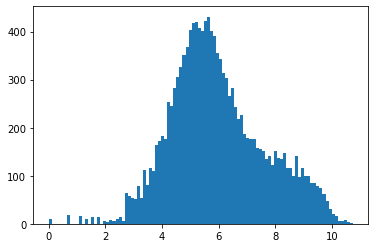

In [85]:
vols = cells[:,header_cells.index('volm')]
plt.hist(np.log(vols),bins=100);

In [89]:
np.sum(vols>5000)

1250

In [68]:
#np.min(scoreA)
np.unique(icells).shape

(10261,)

In [29]:
save_fls_ = [fl for fl in save_fls if ('_set3' in fl)]# in fl if '035' in fl][0]
cell_df,df=None,None
for save_fl in tqdm(np.sort(save_fls_)[:]):
    ### load info
    dic = np.load(save_fl)
    XF = dic['XF']
    header = list(dic['header'])
    genes_decoded = dic['genes']
    cells = dic['cellinfo'][1:]
    header_cells = dic['header_cells']
    ### Rethrehold based on score
    iscore = list(header).index('score')
    scoreA = XF[:,iscore]
    keep = scoreA>-0.5
    ugns,gns_i = np.unique(genes_decoded[keep],return_inverse=True)

    icell = header.index('cell_id')
    icells = XF[keep,icell].astype(int)
    
    icellsf = cells[:,0].astype(int)
    
    mcell = np.max(icellsf)+1
    gn_cell,gn_cell_cts = np.unique(mcell*gns_i+icells,return_counts=True)
    len(gn_cell)
    igns_ = gn_cell//mcell
    icells_ = gn_cell%mcell
    Mcts = np.zeros([mcell,len(ugns)])
    Mcts[icells_,igns_]=gn_cell_cts

    Mcts[icellsf].shape
    ifov,iset = int(XF[0,header.index('ifov')]),int(XF[0,header.index('iset')])
    icellsnm = [icell+10**5*ifov for icell in icellsf]#icellsnm = [icell+10**5*ifov+10**9*iset for icell in icellsf]

    dfT = pd.DataFrame(Mcts[icellsf],columns=ugns,index=icellsnm)


    df = dfT if df is None else pd.concat([df,dfT])
    cell_dfT = pd.DataFrame(cells,columns=header_cells,index=icellsnm)
    cell_df = cell_dfT if cell_df is None else pd.concat([cell_df,cell_dfT])

Finished Conv_zscan__040


In [62]:
800*6*100

480000

In [59]:
print(save_fl)

\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__040--_D16.npz


In [51]:
print(drift_folder)

\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\DriftAcrossDatasets


In [52]:
final_folder_dec = r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots'
os.makedirs()

In [ ]:
os.se

In [37]:
ifov = int(dec.fov.split('_')[-1].split('.')[0])
ifov

40

In [20]:
im_segm

In [24]:
dec.XH_pruned.shape

(23433393, 4, 10)

In [28]:
resc

array([2, 2, 2])

In [57]:
save_fl = 'saveDecodedFinalV1--'+os.path.basename(dec.save_folder)+'--'+dec.fov.split('.')[0]+'--'+dec.set_+'.npz'

'saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__040--_D16.npz'

In [54]:
os.path.basename(dec.save_folder)

'MERFISH_AnalysisP12'

In [ ]:
def main_analysis(fov,scoresRef=scoresRef,force=force):
    if type(scoresRef) is str: scoresRef = np.load(scoresRef,allow_pickle=True)
    save_fl = save_folder_all+os.sep+os.sep+tag_save+fov.split('.')[0]+'--'+set_+'.npz'
    if not os.path.exists(save_fl) or force:

        if not os.path.exists(save_folder_all): os.makedirs(save_folder_all)


        ### Load point data ###############################
        all_gns_names = []
        XFF,genesFF = None,None
        for isave,save_folder in enumerate(save_folders):
            #save_folder = save_folders[0]
            dec = decoder_simple(save_folder,fov,set_)
            loaded = dec.load_decoded()
            if not loaded:
                print(save_fl, "Did not have a valid decoded file.")
                #return None
            dec.gns_names = np.array([gn+'_'+str(isave) if gn in all_gns_names else gn for gn in dec.gns_names])
            all_gns_names = np.unique(np.concatenate([all_gns_names,dec.gns_names]))

            ### Threshold point data ###############################
            dec.ncols=ncols
            get_score_withRef(dec,scoresRef,plt_val=plt_val,gene=None,iSs = None)
            dec.th=th
            if plt_val:
                plot_statistics(dec)
            #print(dec.gns_ordered)



            keepf =  dec.scoreA>dec.th ### keep good score
            icodesf = dec.icodesN[keepf]
            XHfpr = dec.XH_pruned[keepf]

            ### Reorganize data  ###############################
            XHf = np.mean(XHfpr,axis=1)
            XF = XHf[:,[0,1,2,-5,-4,-3,-2,-1,-1,-1,-1]]
            #zc,xc,yc,bk-7,a-6,habs-5,hn-4,h-3
            XF[:,-1] = dec.scoreA[keepf]
            XF[:,-2] = np.where(keepf)[0]
            mnD = np.mean(np.linalg.norm((XHf[:,np.newaxis]-XHfpr)[:,:,:3],axis=-1),axis=-1)
            XF[:,-3]=mnD
            mnH = np.mean(np.abs((XHf[:,np.newaxis]-XHfpr)[:,:,-3]),axis=-1)
            XF[:,-4]=mnH
            genesf = dec.gns_names[icodesf]

            ### Load and apply drift correction
            def get_drft_dic(fl_all_drift):
                drft,flds,fov_,fl_ref= np.load(fl_all_drift,allow_pickle=True)
                return {'--'.join(fld.split(os.sep)[-2:]):drft_[0] for fld,drft_ in zip(flds,drft)}
            fl_all_drift = drift_folder+os.sep+'driftNew_'+fov+'--'+set_+'.pkl'
            drft_dic_all = get_drft_dic(fl_all_drift)
            fl_all_drift = save_folder+os.sep+'driftNew_'+fov+'--'+set_+'.pkl'
            drft_dic_group = get_drft_dic(fl_all_drift)
            key_segm = [key for key in drft_dic_all if segm_tag in key][0]
            key_align = np.intersect1d(list(drft_dic_all.keys()),list(drft_dic_group.keys()))[0]
            th1_to_h0 = drft_dic_all[key_segm]-drft_dic_all[key_align]
            th1_gr = drft_dic_group[key_align]
            tzxyf = th1_gr+th1_to_h0
            XF[:,:3]=XF[:,:3]-tzxyf #### do not add here
            
            
            ### Load dapi
            if True:
                dec.fl_dapi = segm_folder+os.sep+fov+'--'+segm_tag+set_+'--dapi_segm.npz'
                dic = np.load(dec.fl_dapi)
                im_segm = dic['segm']
                dec.shape = dic['shape']
                dec.im_segm_=stitch3d_new(im_segm,minsz = 200,maxsz = 1000,th_int=0.66,th_cover=0.8,th_max_subcell=0.66,nexpand = 5)
                dec.shapesm = np.array(dec.im_segm_.shape)
            else:
                dec.fl_dapi = segm_folder+os.sep+'allCells--'+set_+'.zarr'
                full_im_segm = da.from_zarr(dec.fl_dapi)
                dic_info = np.load(dec.fl_dapi.replace('.zarr','.npz'))
                #fovs = fovs,xys=xys,xs_pix=xs_pix,ys_pix=ys_pix,sxy_pixsz=[sx,sy,um_per_pix],shape=shape,shapesm=im_segm.shape)
                xs_pix,ys_pix=dic_info['xs_pix'],dic_info['ys_pix']
                fovs,dec.shape=dic_info['fovs'],dic_info['shape']
                sx,sy,um_per_pix = dic_info['sxy_pixsz']
                ifv_ = list(fovs).index(fov)
                x_,y_ = xs_pix[ifv_],ys_pix[ifv_]
                dec.shapesm = np.array([len(full_im_segm),sx,sy])
                ### incomplete here
                np.min(XF[:,:3],axis=0)
                
                tz,tx,ty = np.round(tzxyf/dec.shape*dec.shapesm).astype(int)
                
                dec.im_segm_= np.array(full_im_segm[...,x_+tx:x_+sx+tx,y_+ty:y_+sy+ty])
            
            if XFF is None:
                XFF,genesFF = XF,genesf
            else:
                XFF,genesFF = np.concatenate([XFF,XF]),np.concatenate([genesFF,genesf])



        def get_cell_id(dec,Xh):
            if not hasattr(dec,'im_segm_'): 
                good = np.ones(len(Xh),dtype=bool)
                cells_ = np.zeros(len(Xh),dtype=int)
                return cells_,good
            im_segm = dec.im_segm_
            dec.shapesm = dec.im_segm_.shape
            Xcms = Xh[:,:3]
            Xred = np.round((Xcms/dec.shape)*dec.shapesm).astype(int)
            good = ~np.any((Xred>=dec.shapesm)|(Xred<0),axis=-1)
            Xred = Xred[good]
            if True:
                v = napari.view_points(Xred,opacity=0.1,size=1.5)
                v.add_labels(im_segm)
            return im_segm[tuple(Xred.T)],good

        XF,genesf = XFF,genesFF  
        cell_id,good = get_cell_id(dec,XF)
        XF_ = np.concatenate([XF[good],cell_id[:,np.newaxis]],axis=-1)
        genesf_ = genesf[good]
        iset = int(dec.set_.split('_set')[-1])
        ifov = int(dec.fov.split('_')[-1].split('.')[0])
        isets = np.array([iset]*len(cell_id))[:,np.newaxis]
        ifovs = np.array([ifov]*len(cell_id))[:,np.newaxis]
        cell_id = cell_id[:,np.newaxis]
        XF_ = np.concatenate([XF[good],cell_id,ifovs,isets],axis=-1)

        get_xyfov(dec)
        XF_ = XF_[:,list(np.arange(XF_.shape[-1]))+[-1,-1]]
        XF_[:,-2:]=dec.xfov,dec.yfov
        header = ['z','x','y','abs_brightness','cor','brightness','color','mean_bightness_variation','mean_distance_variation',
                  'index_from_XH_pruned','score','cell_id','ifov','iset','xfov','yfov']

        if not hasattr(dec,'im_segm_'): dec.im_segm_=np.zeros(np.array([30,3000,3000])//4)
        icells,vols = np.unique(dec.im_segm_,return_counts=True)
        cms = np.array(ndimage.center_of_mass(np.ones_like(dec.im_segm_),dec.im_segm_,icells))
        #icells,vols = np.unique(dec.im_segm_,return_counts=True)
        cms = np.array(ndimage.center_of_mass(np.ones_like(dec.im_segm_),dec.im_segm_,icells))
        cellinfo = cms[:,[0,0,0,1,2,0,0]]
        cellinfo[:,0]=icells
        cellinfo[:,1]=vols
        cellinfo[:,-2:]=dec.xfov,dec.yfov
        header_cells = ['cell_id','volm','zc','xc','yc','xfov','yfov']
        if True:
            np.savez_compressed(save_fl,XF=XF_.astype(np.float32),
                                genes = genesf_,cellinfo=cellinfo.astype(np.float32),header_cells=header_cells,header=header)
        print("Finished",fov)
        

In [23]:
tzxyf

array([  -3.29521794, -433.87942907,  -51.25487467])

In [14]:
import napari
napari.view_labels(im_segm)

Viewer(axes=Axes(visible=False, labels=True, colored=True, dashed=False, arrows=True), camera=Camera(center=(0.0, 724.5, 724.5), zoom=0.3498620689655172, angles=(0.0, 0.0, 90.0), perspective=0.0, interactive=True), cursor=Cursor(position=(1.0, 1.0, 0.0), scaled=True, size=10, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=3, ndisplay=2, last_used=0, range=((0.0, 15.0, 1.0), (0.0, 1450.0, 1.0), (0.0, 1450.0, 1.0)), current_step=(7, 725, 725), order=(0, 1, 2), axis_labels=('0', '1', '2')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Labels layer 'im_segm' at 0x24f7f9d1bb0>], scale_bar=ScaleBar(visible=False, colored=False, ticks=True, position=<Position.BOTTOM_RIGHT: 'bottom_right'>, font_size=10, unit=None), text_overlay=TextOverlay(visible=False, color=(0.5, 0.5, 0.5, 1.0), font_size=10, position=<TextOverlayPosition.TOP_LEFT: 'top_left'>, text=''), overlays=Overlays(interaction_box=InteractionBox(points=None, show=False, show_handle=False, show_vertic